In [2]:
path='dogvscat/training_set/cats/cat.1000.jpg'

In [3]:
from PIL import Image

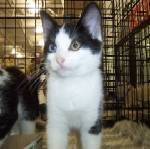

In [4]:
Image.open(path)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

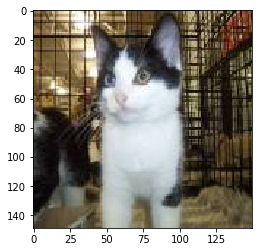

In [6]:
plt.imshow(plt.imread(path))
plt.show()

In [7]:
import cv2

In [8]:
img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)

In [9]:
img.shape

(149, 150)

In [10]:
img=cv2.resize(img,(128,128))

In [11]:
img.shape

(128, 128)

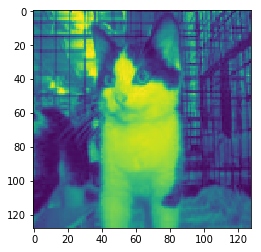

In [12]:
plt.imshow(img)

In [13]:
import os
dogs_images=[]
path='dogvscat/training_set/dogs'
for image in os.listdir(path):
    full_path=os.path.join(path,image)
    img=cv2.imread(full_path,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(128,128))
    dogs_images.append(img)

In [14]:
dogs=np.concatenate(dogs_images)

In [15]:
cats_images=[]
path='dogvscat/training_set/cats'
for image in os.listdir(path):
    full_path=os.path.join(path,image)
    img=cv2.imread(full_path,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(128,128))
    cats_images.append(img)

In [16]:
cats=np.concatenate(cats_images)

In [17]:
df1=pd.DataFrame(dogs)
df2=pd.DataFrame(cats)

In [18]:
df1['label']=1
df2['label']=0

In [86]:
df3=df1[:5000]

In [87]:
df4=df2[507000:]

In [88]:
df=pd.concat([df3,df4])

In [89]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,173,115,129,127,132,112,105,70,61,87,...,93,104,74,90,88,95,88,91,74,1
1,158,89,101,93,70,48,72,76,89,116,...,78,68,57,72,79,79,85,95,82,1
2,155,77,67,67,76,81,87,85,95,103,...,77,87,93,104,111,81,85,85,65,1
3,152,87,115,128,119,89,90,100,106,97,...,14,70,93,97,88,70,64,61,55,1
4,161,95,103,96,87,78,92,105,108,101,...,0,23,69,78,83,85,85,89,69,1


In [90]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
511995,190,184,167,140,80,69,83,110,132,118,...,214,211,198,189,179,164,158,157,144,0
511996,191,184,169,150,95,66,75,93,126,118,...,222,216,204,192,164,156,152,145,144,0
511997,192,180,164,150,104,66,75,85,107,117,...,223,216,208,197,181,155,149,157,156,0
511998,191,177,163,146,112,59,81,87,98,111,...,224,219,216,199,168,163,150,151,142,0
511999,162,153,143,125,102,57,73,81,81,83,...,190,186,183,169,147,130,126,114,112,0


In [91]:
feature=df.drop('label',axis=1)

In [92]:
target=df['label']

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [95]:
x_train,x_test,y_train,y_test=train_test_split(feature,target)

In [96]:
model=LogisticRegression()

In [97]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
y_pred=model.predict(x_test)

In [99]:
confusion_matrix(y_test,y_pred)

array([[728, 547],
       [480, 745]], dtype=int64)

In [100]:
accuracy_score(y_test,y_pred)

0.5892

In [147]:
path='dogvscat/test_set/cats/cat.4014.jpg'

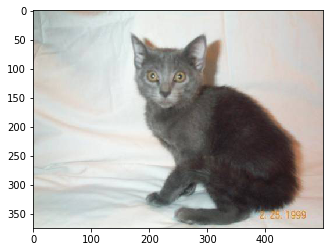

In [148]:
plt.imshow(plt.imread(path))

In [149]:
img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)

In [150]:
img=cv2.resize(img,(128,128))

In [151]:
model.predict(img)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [152]:
prediction=model.predict(img)

In [153]:
np.mean(prediction==0)

0.6484375

In [154]:
np.mean(prediction==1)

0.3515625

In [155]:
path='dogvscat/test_set/dogs/dog.4010.jpg'

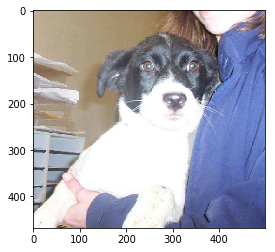

In [167]:
plt.imshow(plt.imread(path))

In [157]:
img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)

In [158]:
img=cv2.resize(img,(128,128))

In [159]:
prediction=model.predict(img)

In [160]:
prediction

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [161]:
np.mean(prediction==0)

0.328125

In [162]:
np.mean(prediction==1)

0.671875